In [129]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
pwd

'/Users/Chabi/Documents/ml_course/Codes/14_Supervised_Learning_Projcet'

In [4]:
df = pd.read_csv('/Users/Chabi/Documents/ml_course/data/Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

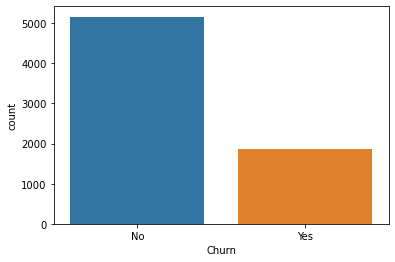

In [9]:
sns.countplot(data=df,
             x='Churn');

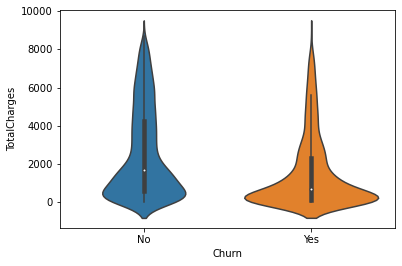

In [10]:
sns.violinplot(data=df,
            x='Churn',
            y='TotalCharges');

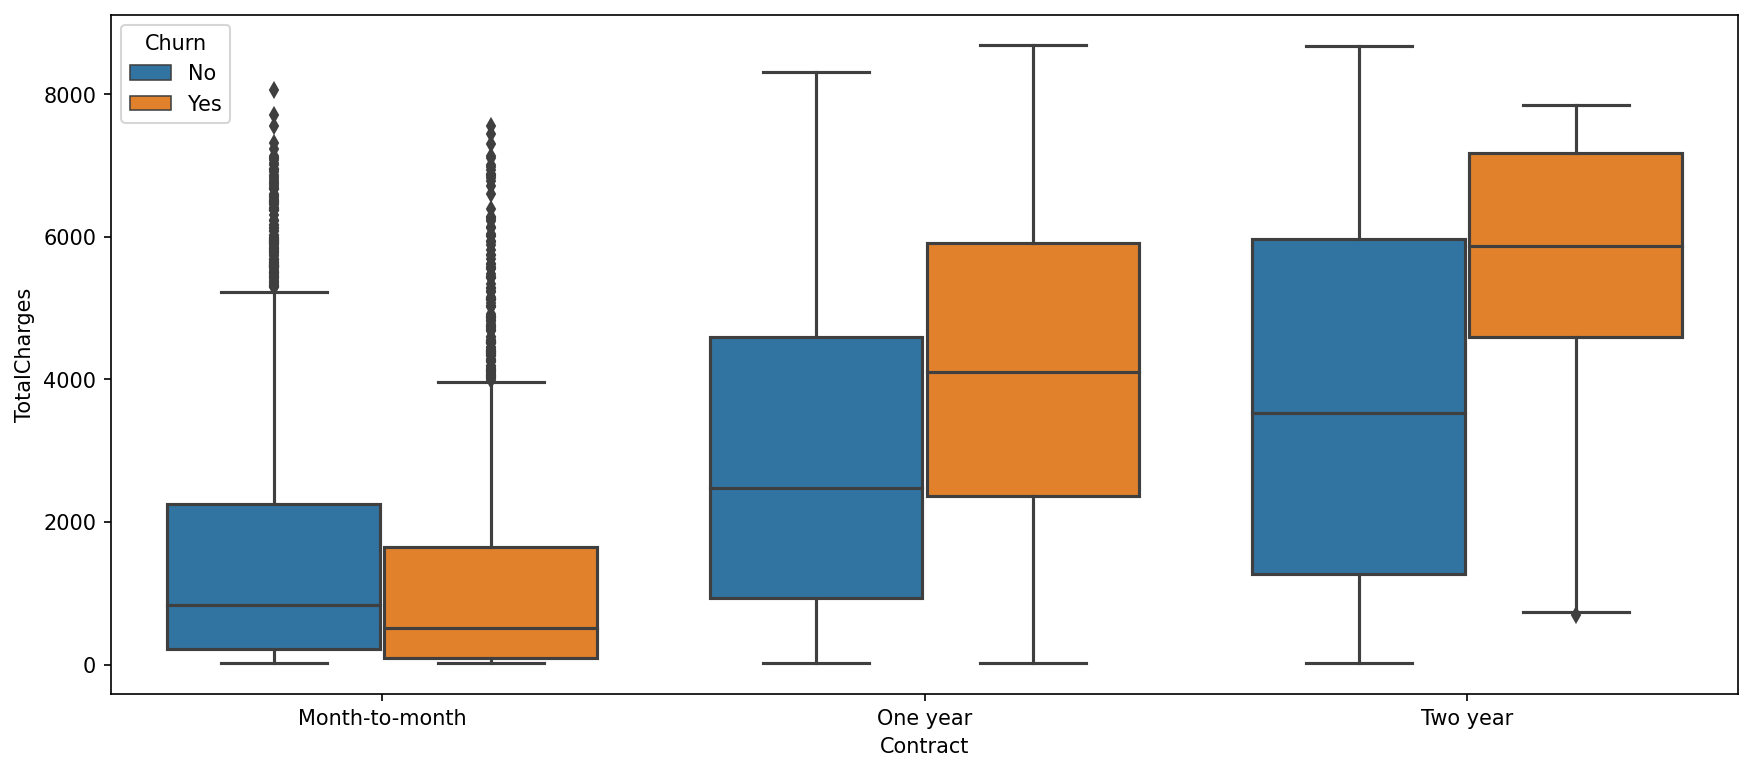

In [11]:
plt.figure(figsize=(14, 6),
          dpi=150)
sns.boxplot(data=df,
            x='Contract',
            y='TotalCharges',
            hue='Churn');

In [12]:
corr_df  = pd.get_dummies(df[['gender', 
                              'SeniorCitizen',
                              'Partner', 
                              'Dependents',
                              'PhoneService', 
                              'MultipleLines', 
                              'InternetService',
                              'OnlineSecurity', 
                              'OnlineBackup', 
                              'DeviceProtection', 
                              'TechSupport',
                              'StreamingTV', 
                              'StreamingMovies', 
                              'Contract',
                              'PaperlessBilling',
                              'PaymentMethod',
                              'Churn']]).corr()
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

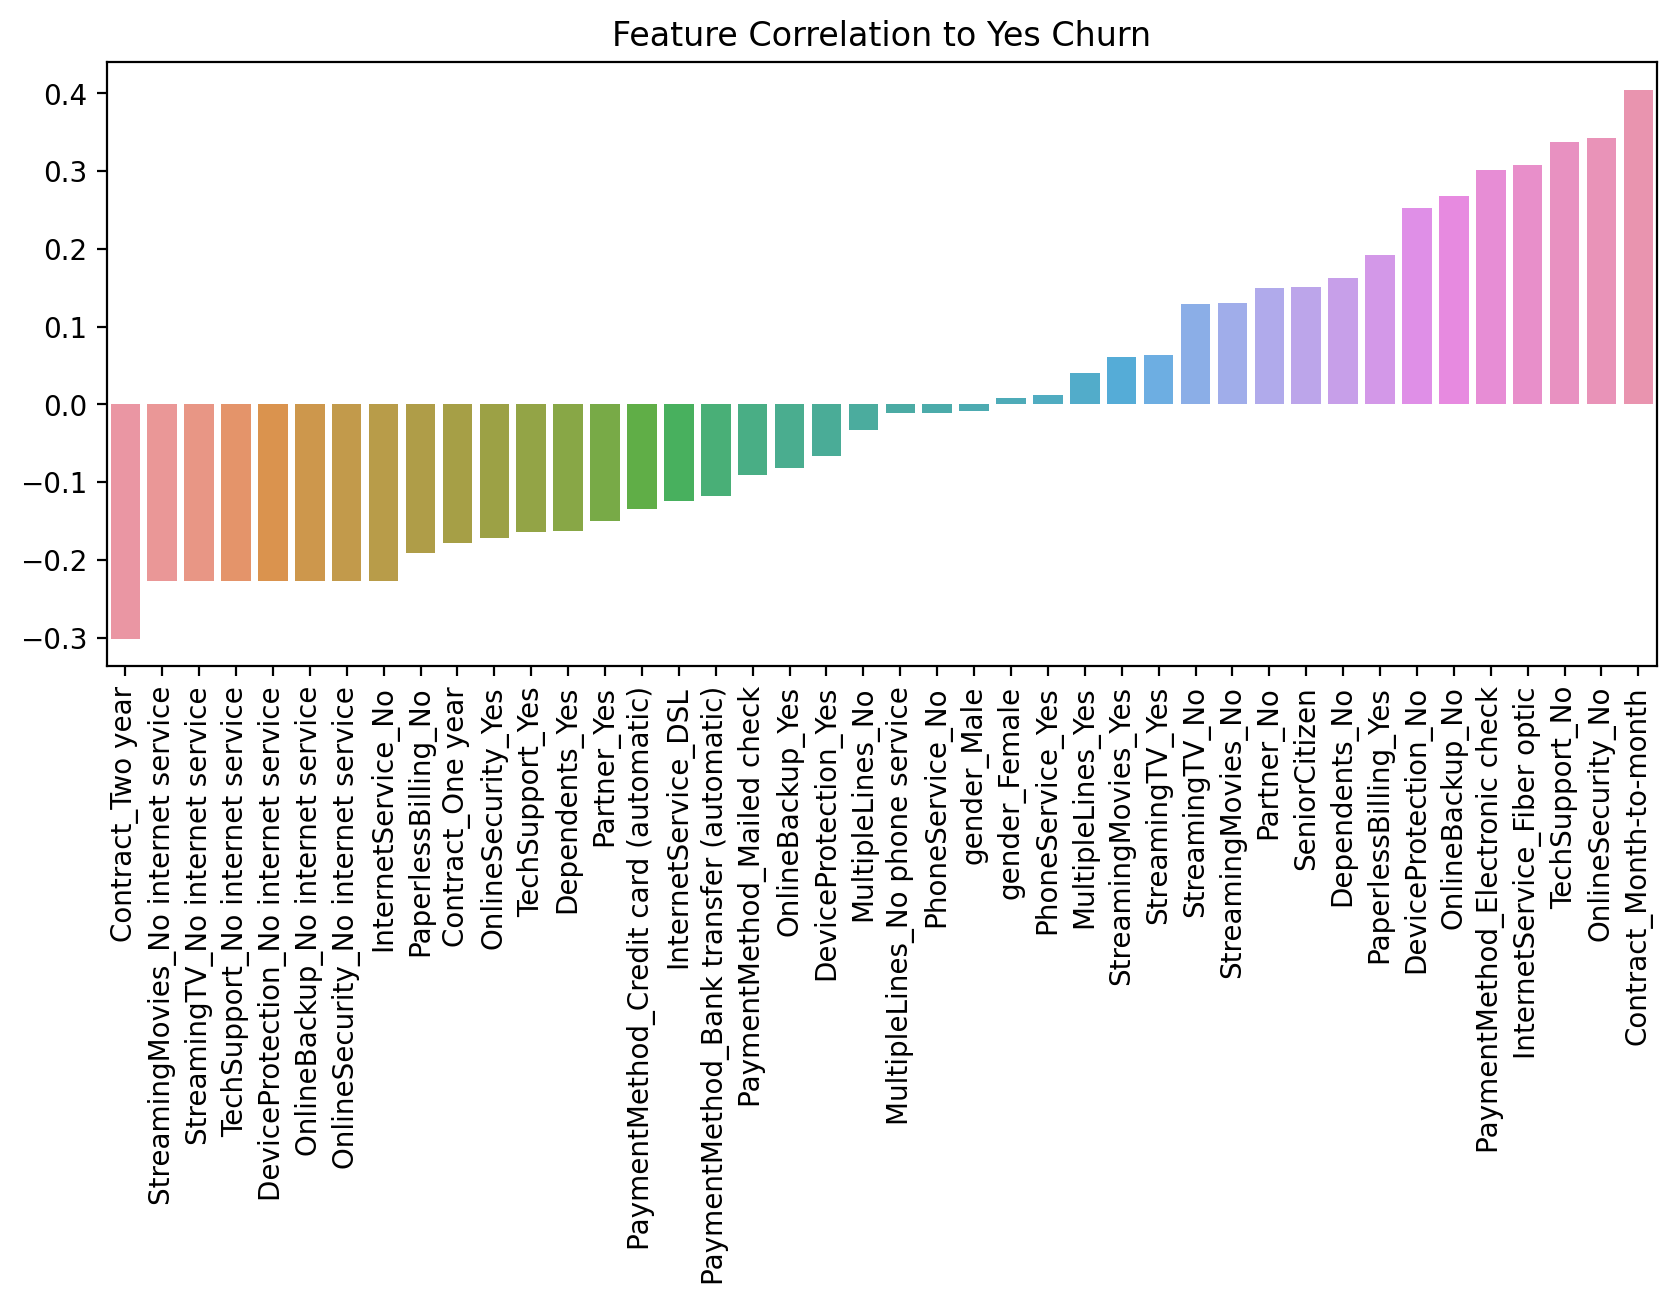

In [13]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes']
            .sort_values().iloc[1:-1]
            .index, y=corr_df['Churn_Yes']
            .sort_values()
            .iloc[1:-1]
            .values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

In [14]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

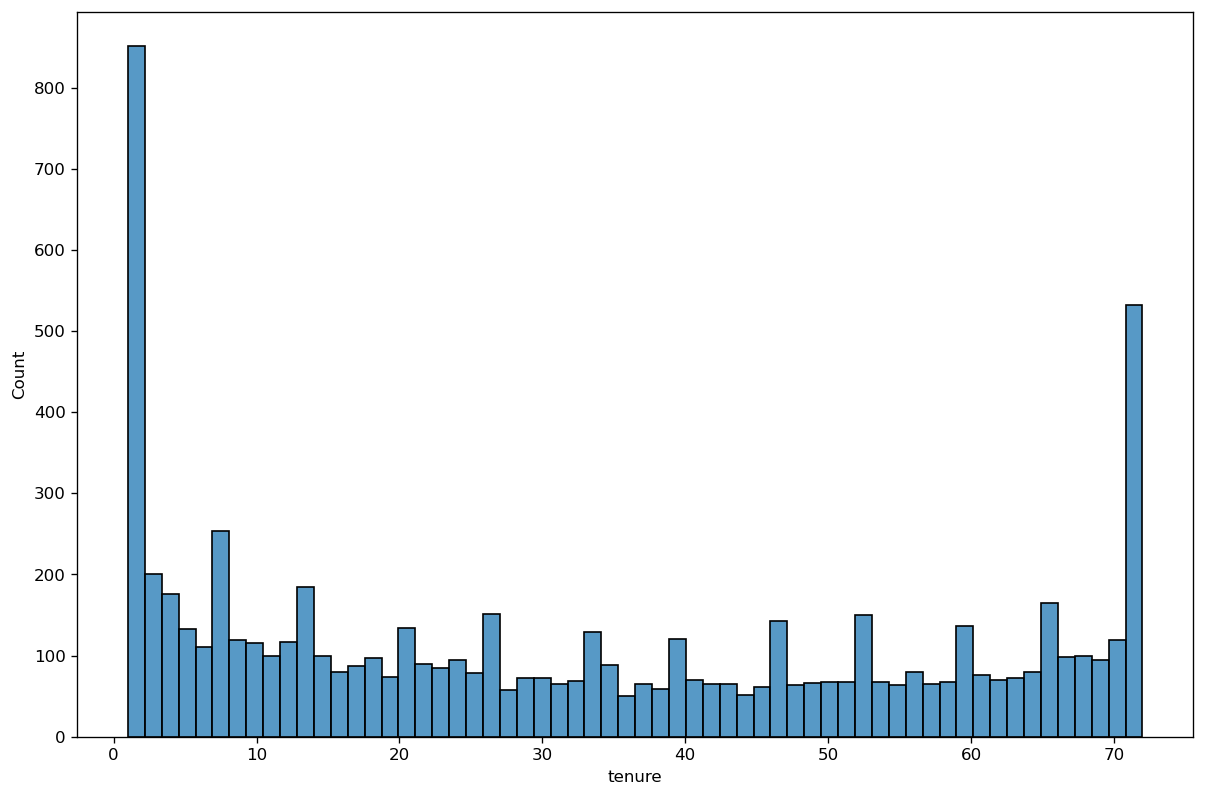

In [15]:
plt.figure(figsize=(12,8),
            dpi=120)
sns.histplot(data=df,
             x='tenure',
             bins=60);        

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

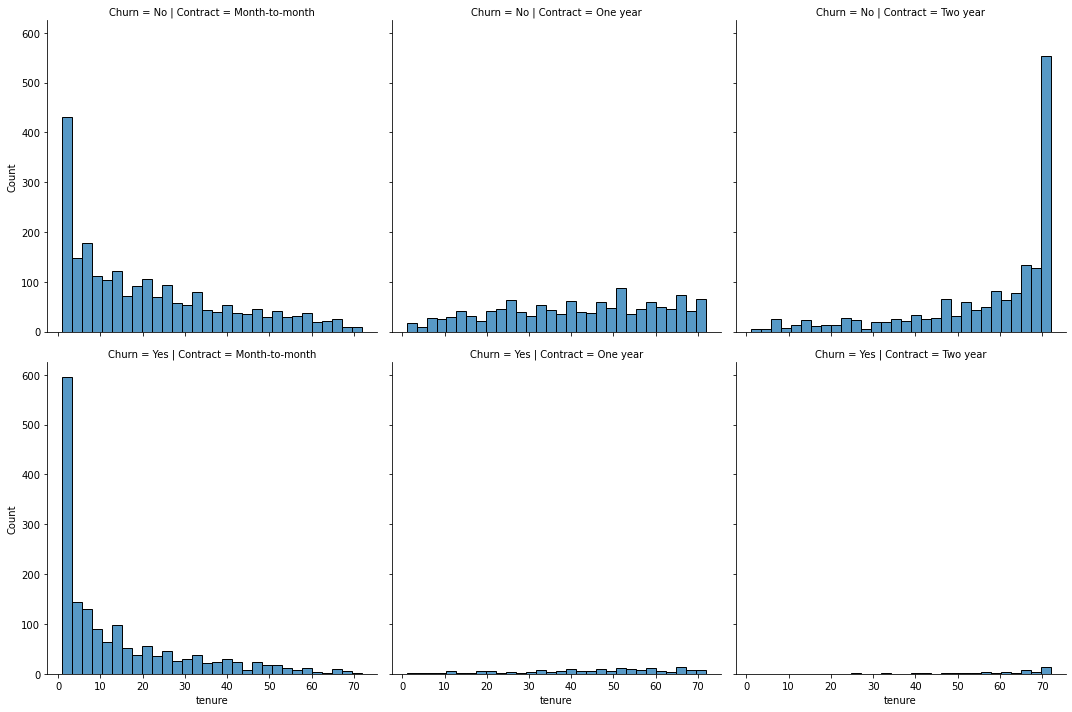

In [16]:
sns.displot(data=df, 
            x="tenure", 
            col="Contract",
            row="Churn",
            bins=30);

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

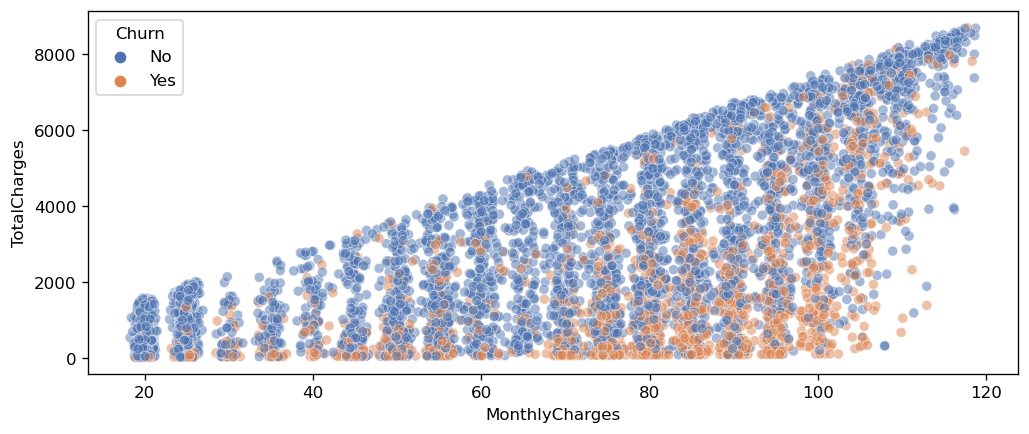

In [17]:
plt.figure(figsize=(10,4),
            dpi=120)
sns.scatterplot(data=df,
                x='MonthlyCharges',
                y='TotalCharges',
                hue='Churn',
                palette='deep',
                alpha=0.5);

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [18]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']
churn_rate = round((yes_churn/(yes_churn + no_churn))*100, 2)

In [19]:
churn_rate = churn_rate.transpose()['customerID']

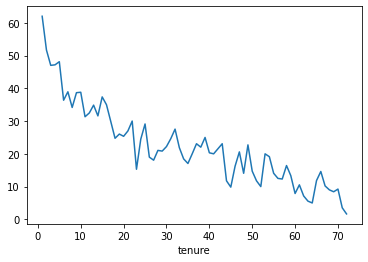

In [20]:
churn_rate.plot();

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [21]:
def cohort(tenure):
    if tenure<13:
        return '0-12 Months'
    elif tenure<25:
        return '12-24 Months'
    elif tenure<49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [22]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [23]:
df[['Tenure Cohort', 'tenure']]

,Tenure Cohort,tenure
0,0-12 Months,1
1,24-48 Months,34
2,0-12 Months,2
3,24-48 Months,45
4,0-12 Months,2
...,...,...
7027,12-24 Months,24
7028,Over 48 Months,72
7029,0-12 Months,11
7030,0-12 Months,4


**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

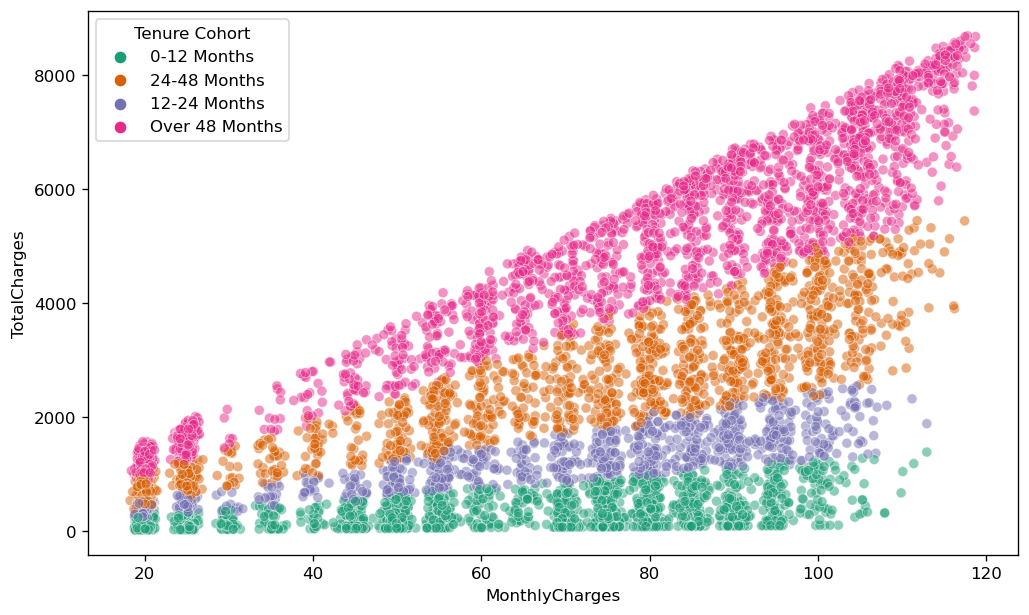

In [24]:
plt.figure(figsize=(10,6),
           dpi=120)
sns.scatterplot(data=df,
                x='MonthlyCharges',
                y='TotalCharges',
                hue='Tenure Cohort',
                alpha=0.5,
                palette='Dark2');

**TASK: Create a count plot showing the churn count per cohort.**

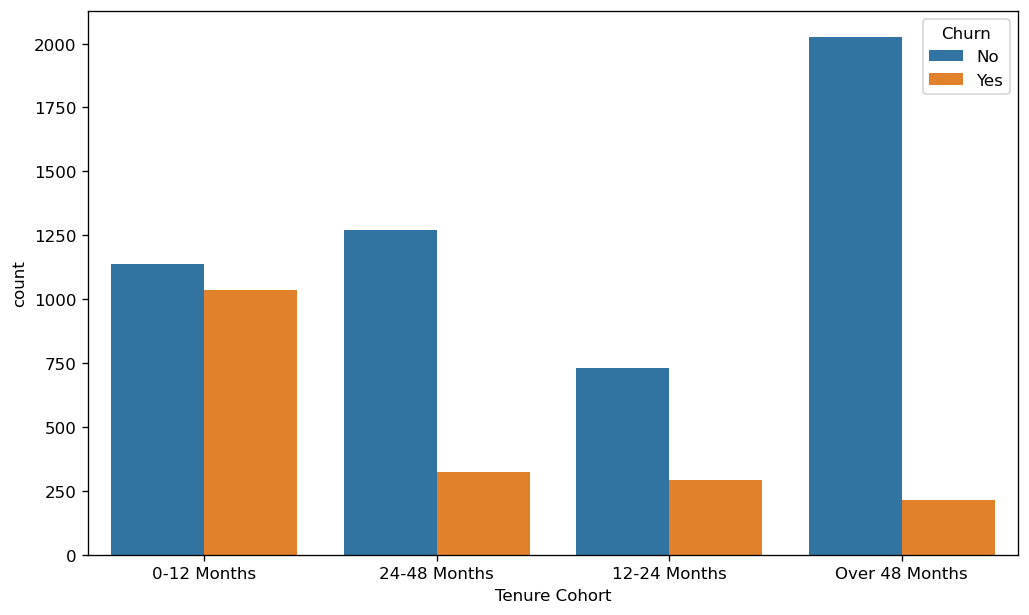

In [25]:
plt.figure(figsize=(10,6),
           dpi=120)
sns.countplot(data=df,
              x='Tenure Cohort',
              hue='Churn');

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

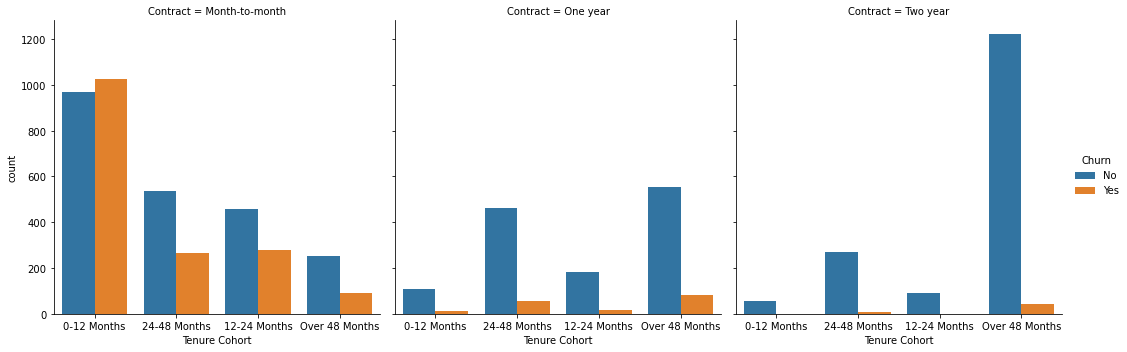

In [26]:
sns.catplot(data=df,
            x='Tenure Cohort',
            hue='Churn',
            col='Contract',
            kind='count');

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [130]:
y=df['Churn']
X=pd.get_dummies(df.drop(['Churn','customerID'],
                         axis=1),
                 drop_first=True)

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=101)

## Decision Tree

In [144]:
decision_tree = DecisionTreeClassifier()

In [145]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [146]:
grid = GridSearchCV(decision_tree,
                    param_grid)

In [147]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [148]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [149]:
y_pred = grid.predict(X_test)

In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



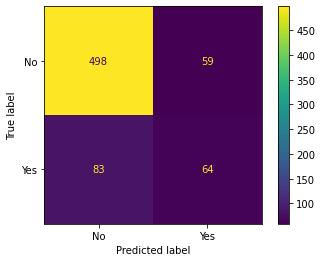

In [151]:
plot_confusion_matrix(grid, X_test, y_test);

In [152]:
grid.best_estimator_.feature_importances_

array([0.01018467, 0.45223938, 0.02596277, 0.04331073, 0.        ,
       0.        , 0.        , 0.00754192, 0.        , 0.00799877,
       0.34022334, 0.        , 0.        , 0.00567638, 0.        ,
       0.00578629, 0.0284796 , 0.        , 0.        , 0.00852294,
       0.        , 0.        , 0.        , 0.        , 0.00962181,
       0.02332128, 0.        , 0.        , 0.03113012, 0.        ,
       0.        , 0.        , 0.        ])

In [153]:
feat_import = grid.best_estimator_.feature_importances_
imp_feat = pd.DataFrame(index=X.columns, data=feat_import,columns=['Importance']) 
imp_feat.sort_values("Importance",ascending=False)

,Importance
tenure,0.452239
InternetService_Fiber optic,0.340223
TotalCharges,0.043311
PaymentMethod_Electronic check,0.031130
DeviceProtection_No internet service,0.028480
MonthlyCharges,0.025963
Contract_Two year,0.023321
SeniorCitizen,0.010185
Contract_One year,0.009622
TechSupport_Yes,0.008523


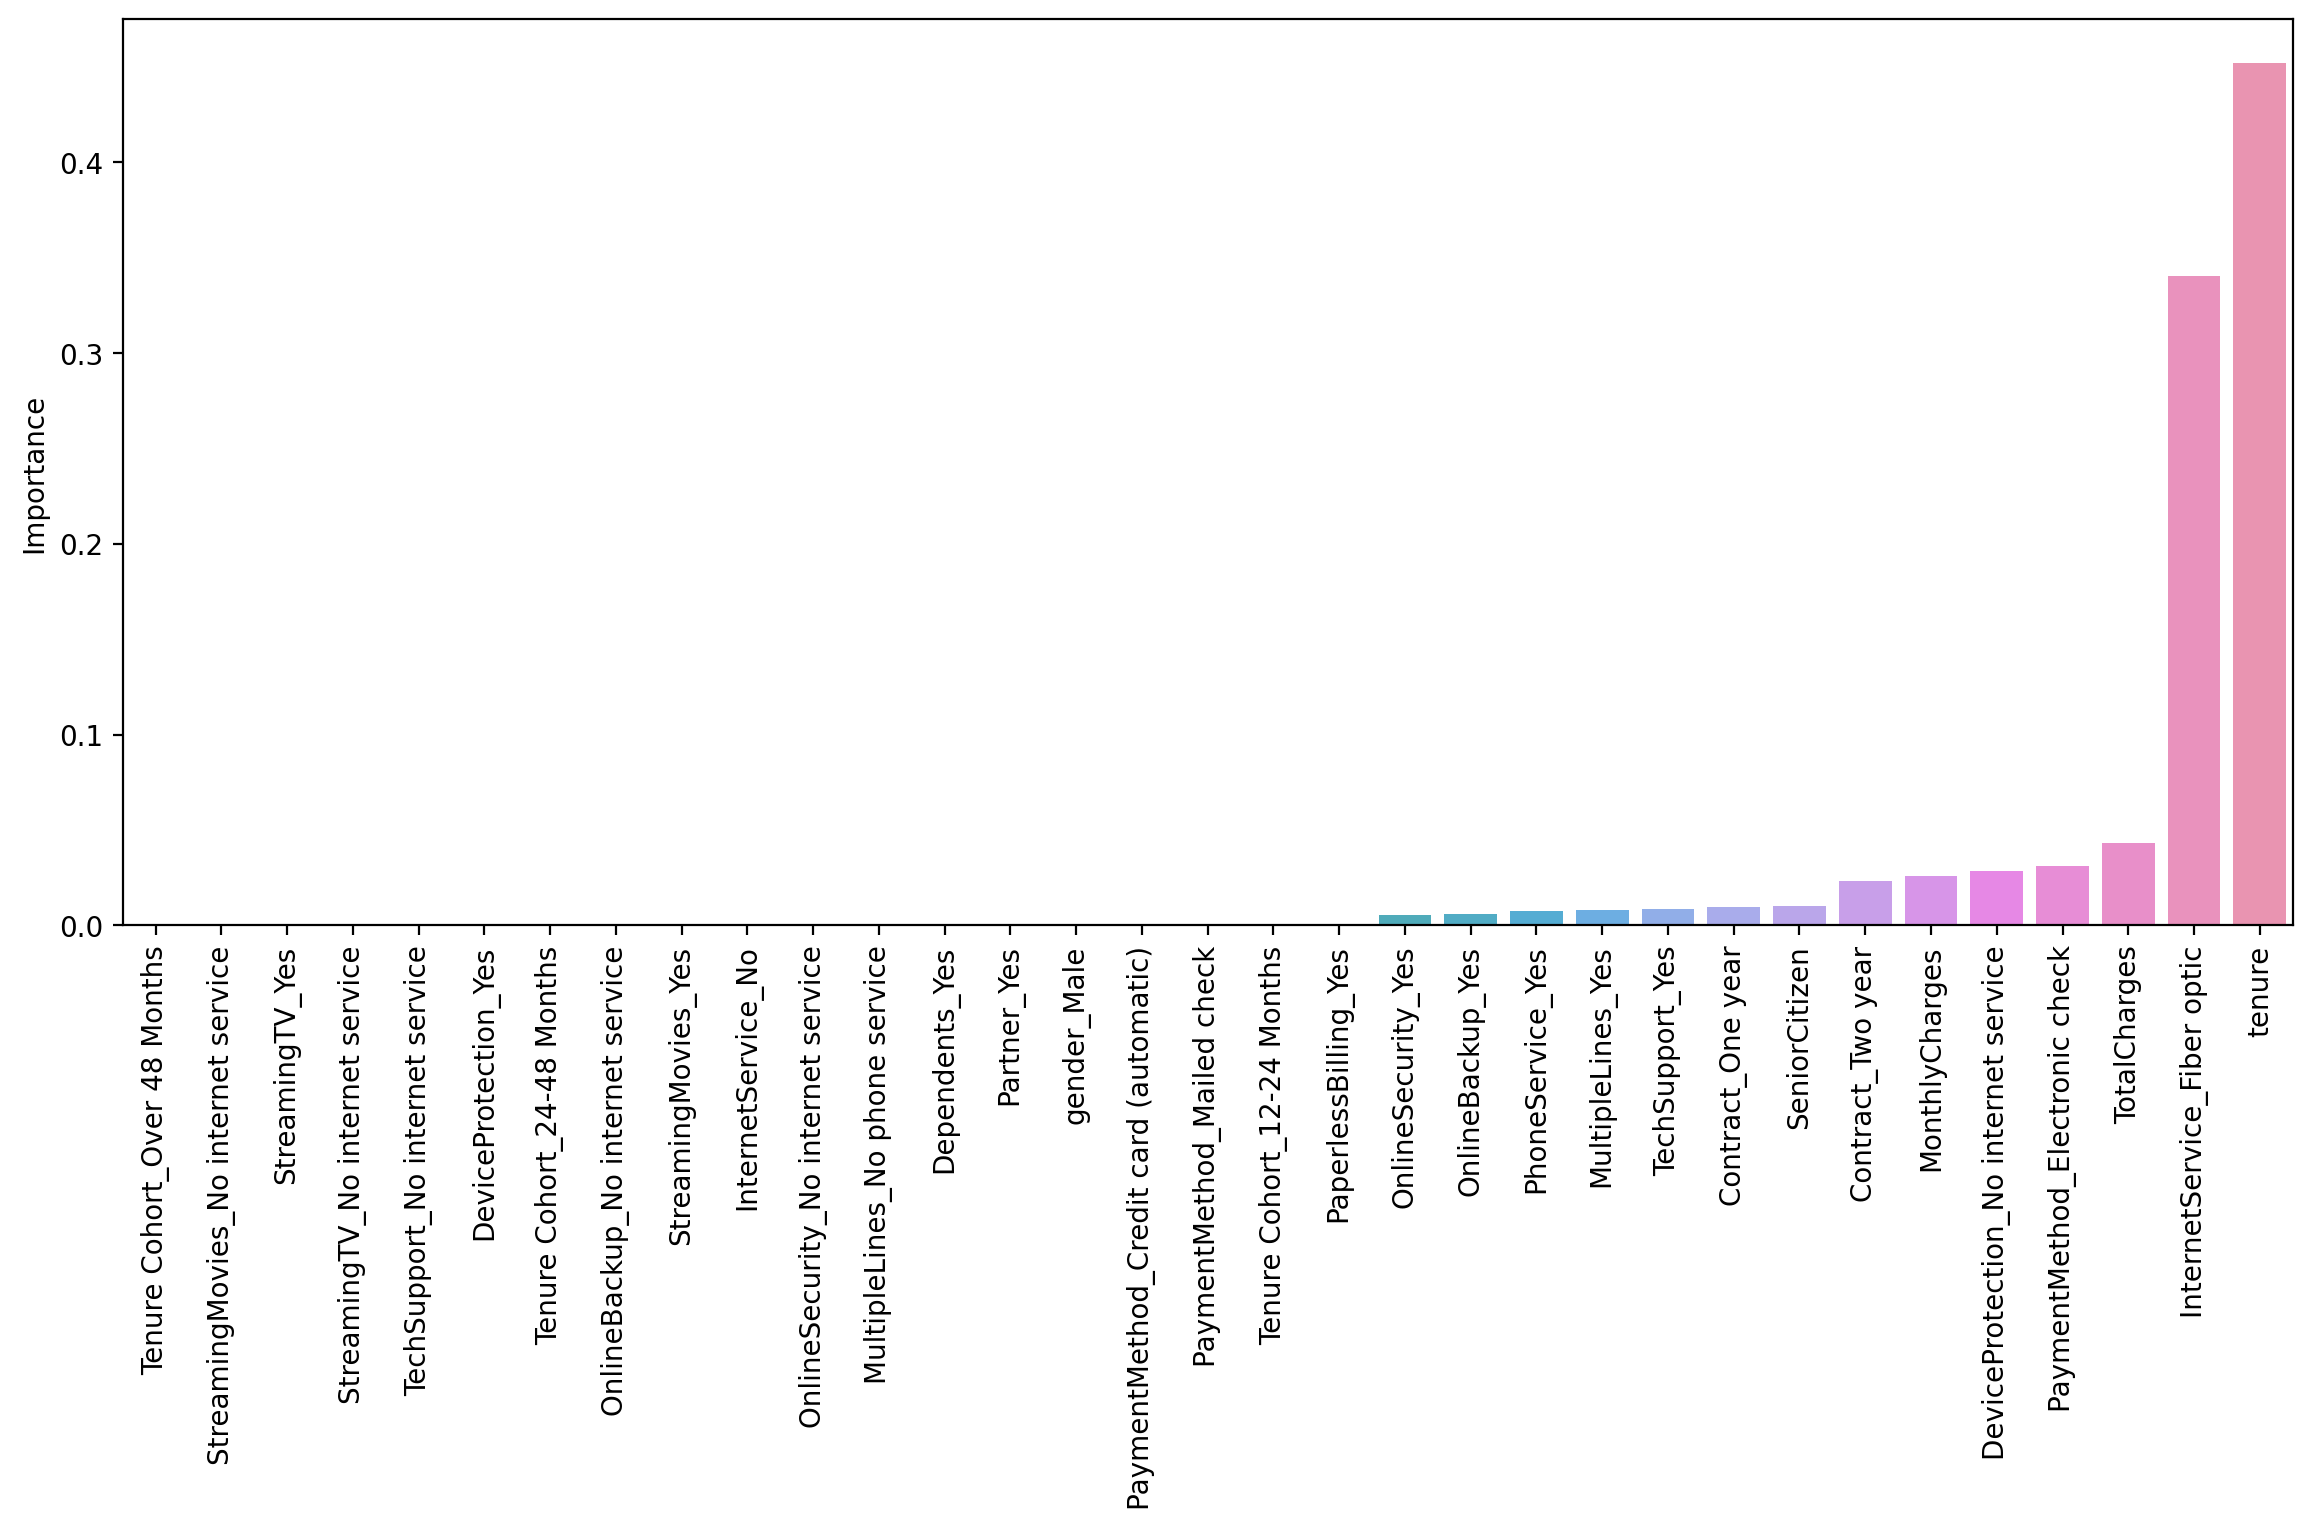

In [154]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feat.sort_values('Importance'),
            x=imp_feat.sort_values('Importance').index,
            y='Importance')
plt.xticks(rotation=90);

## Random Forest

In [87]:
random_forest = RandomForestClassifier()

In [88]:
param_grid = {'criterion': ['gini', 'entropy'],
              'n_estimators':[20, 50, 100, 120, 200]}

In [89]:
grid = GridSearchCV(random_forest,
                    param_grid)

In [90]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [20, 50, 100, 120, 200]})

In [91]:
grid.best_params_

{'criterion': 'gini', 'n_estimators': 200}

In [92]:
y_pred = grid.predict(X_test)

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.50      0.45      0.47       147

    accuracy                           0.79       704
   macro avg       0.68      0.66      0.67       704
weighted avg       0.78      0.79      0.79       704



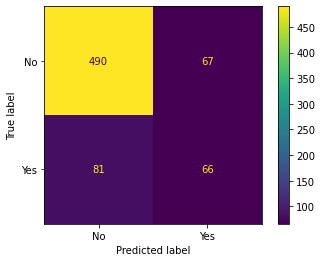

In [94]:
plot_confusion_matrix(grid, X_test, y_test);

In [95]:
grid.best_estimator_.feature_importances_
feat_import = grid.best_estimator_.feature_importances_
imp_feat = pd.DataFrame(index=X.columns, data=feat_import,columns=['Importance']) 
imp_feat.sort_values("Importance",ascending=False)

,Importance
TotalCharges,0.183596
MonthlyCharges,0.161632
tenure,0.154588
InternetService_Fiber optic,0.041957
PaymentMethod_Electronic check,0.037967
Contract_Two year,0.027910
gender_Male,0.027508
PaperlessBilling_Yes,0.026150
OnlineSecurity_Yes,0.023626
TechSupport_Yes,0.022764


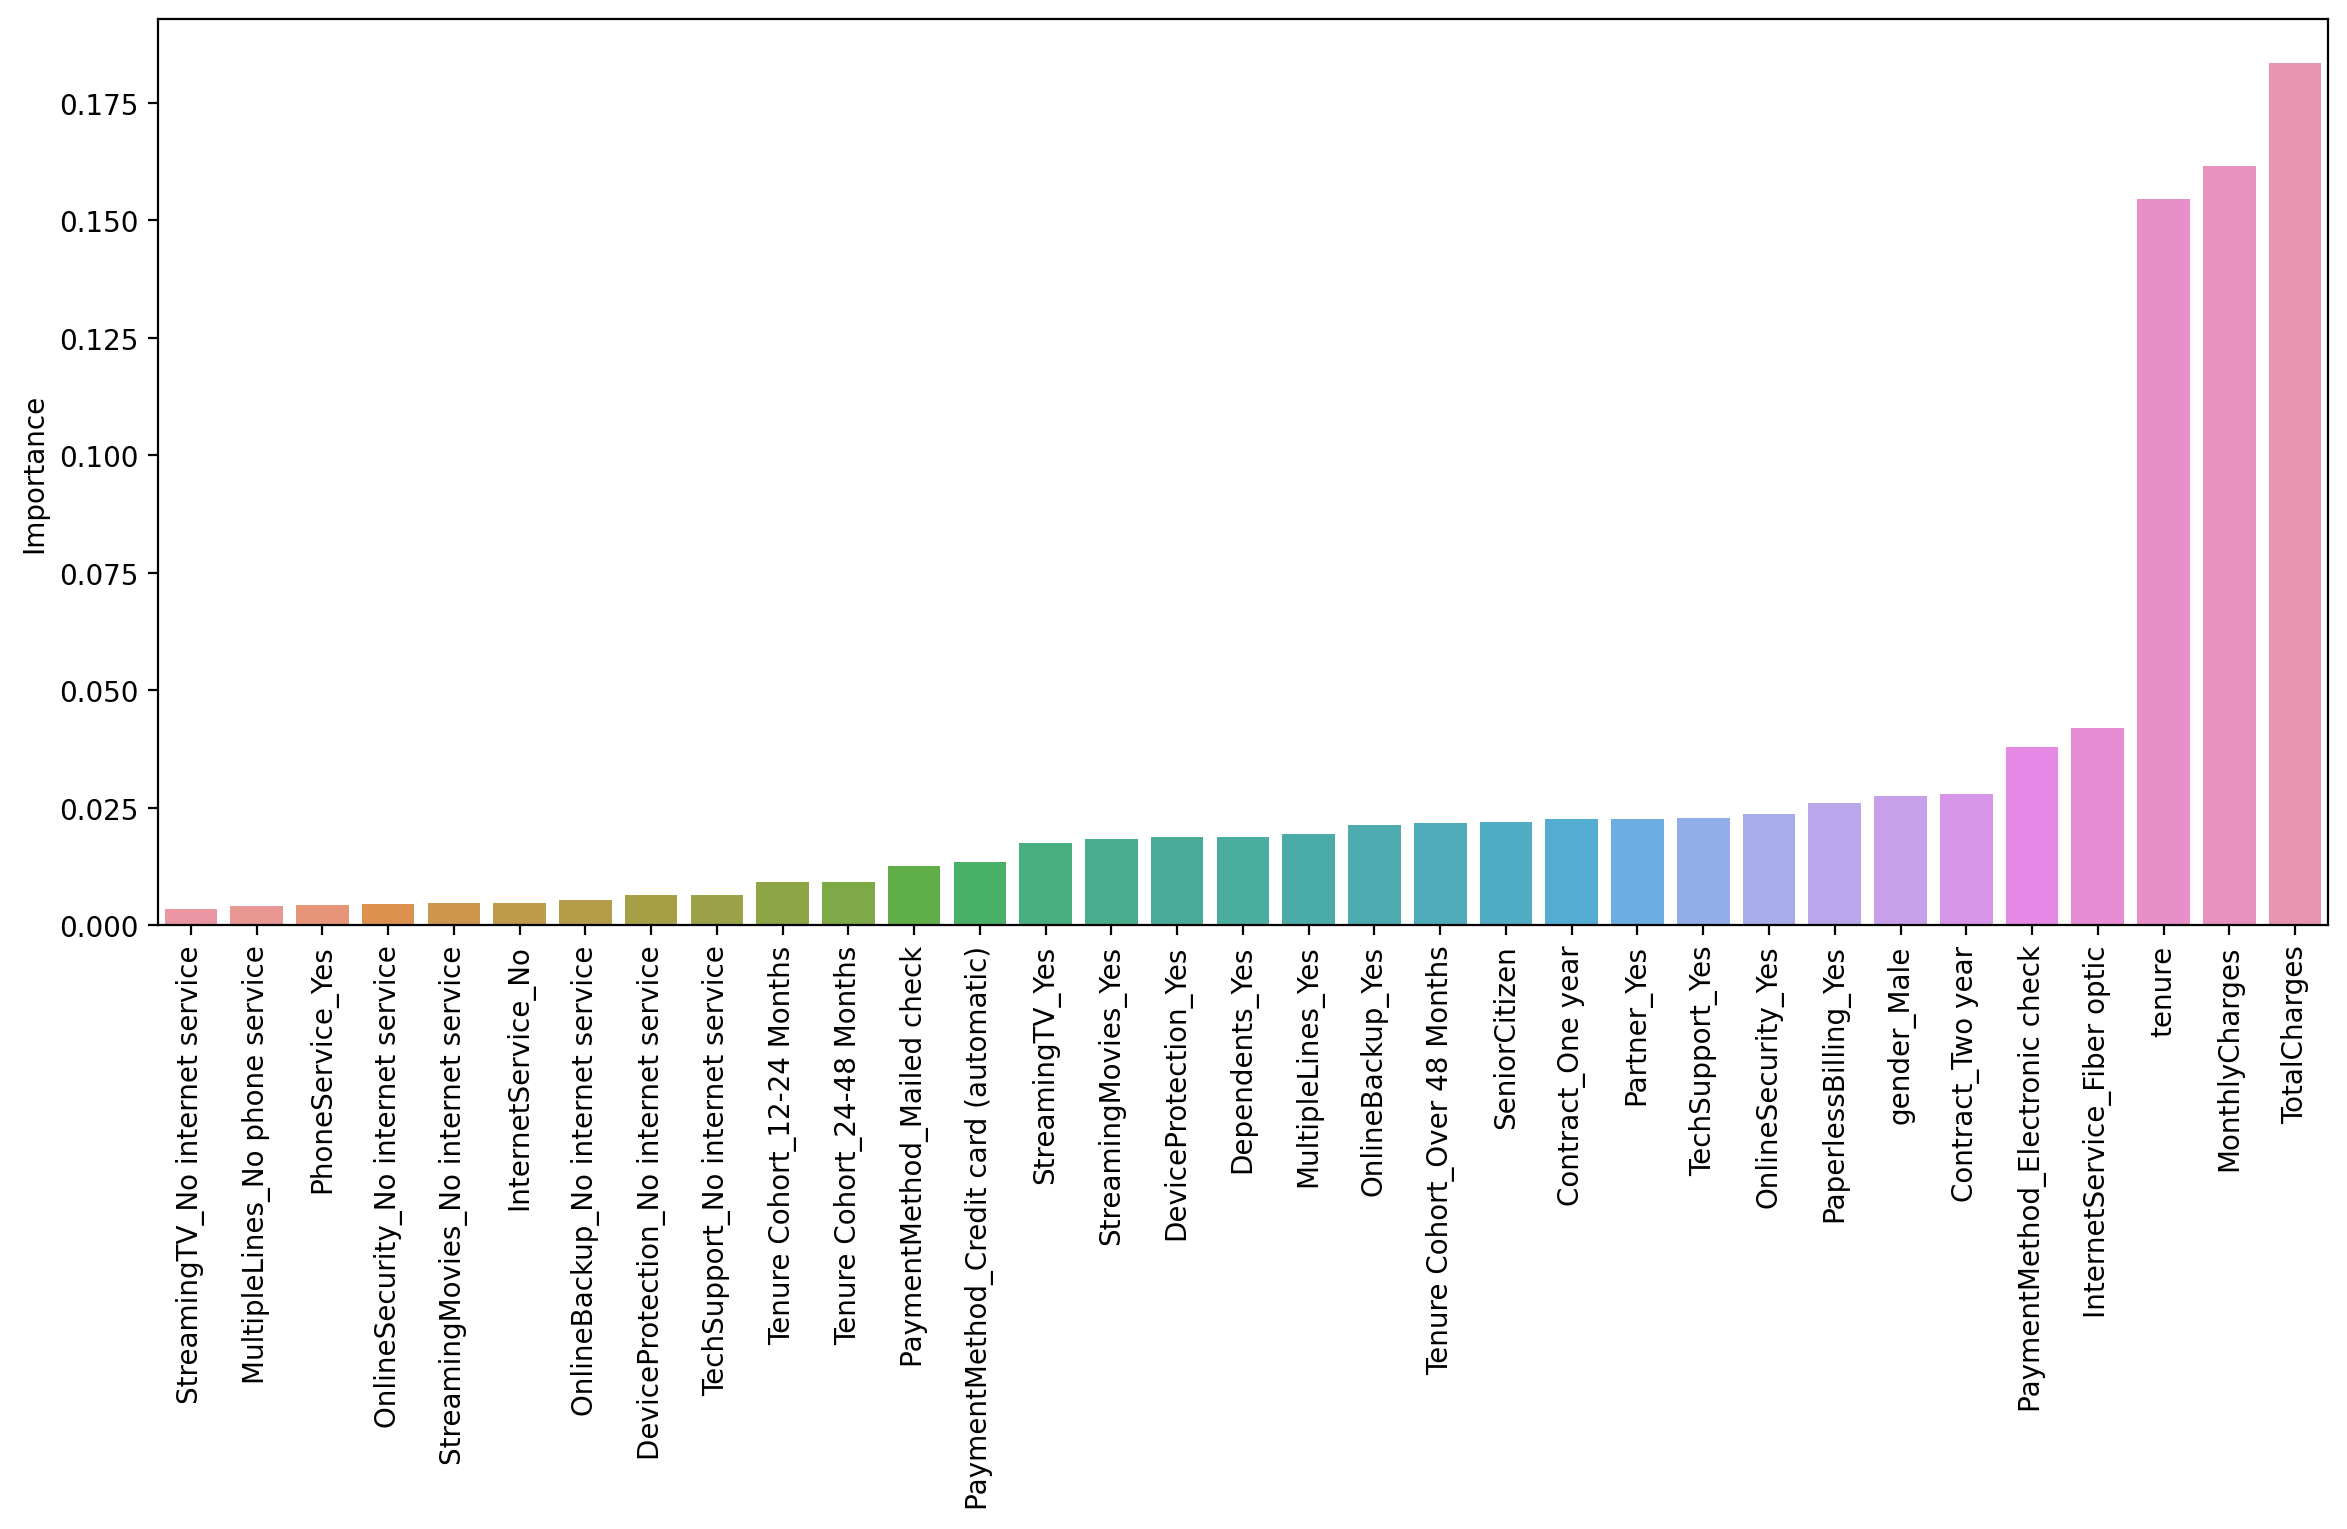

In [96]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feat.sort_values('Importance'),
            x=imp_feat.sort_values('Importance').index,
            y='Importance')
plt.xticks(rotation=90);

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [118]:
gb_tree = GradientBoostingClassifier()

In [119]:
param_grid = {'n_estimators': [1,5,10,20,40,100],
              'max_depth':[3,4,5,6]}

In [120]:
grid = GridSearchCV(gb_tree,
                    param_grid)

In [121]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [122]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [123]:
y_pred = grid.predict(X_test)

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



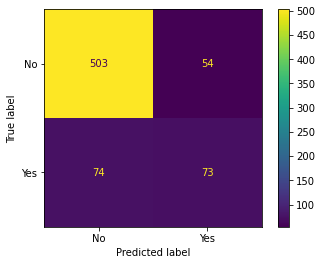

In [126]:
plot_confusion_matrix(grid, X_test, y_test);

In [127]:
grid.best_estimator_.feature_importances_
feat_import = grid.best_estimator_.feature_importances_
imp_feat = pd.DataFrame(index=X.columns, data=feat_import,columns=['Importance']) 
imp_feat.sort_values("Importance",ascending=False)

,Importance
tenure,0.312843
InternetService_Fiber optic,0.194741
PaymentMethod_Electronic check,0.107072
TotalCharges,0.077811
Contract_Two year,0.068659
MonthlyCharges,0.060438
Contract_One year,0.056665
TechSupport_No internet service,0.021681
PaperlessBilling_Yes,0.020154
OnlineSecurity_Yes,0.018294


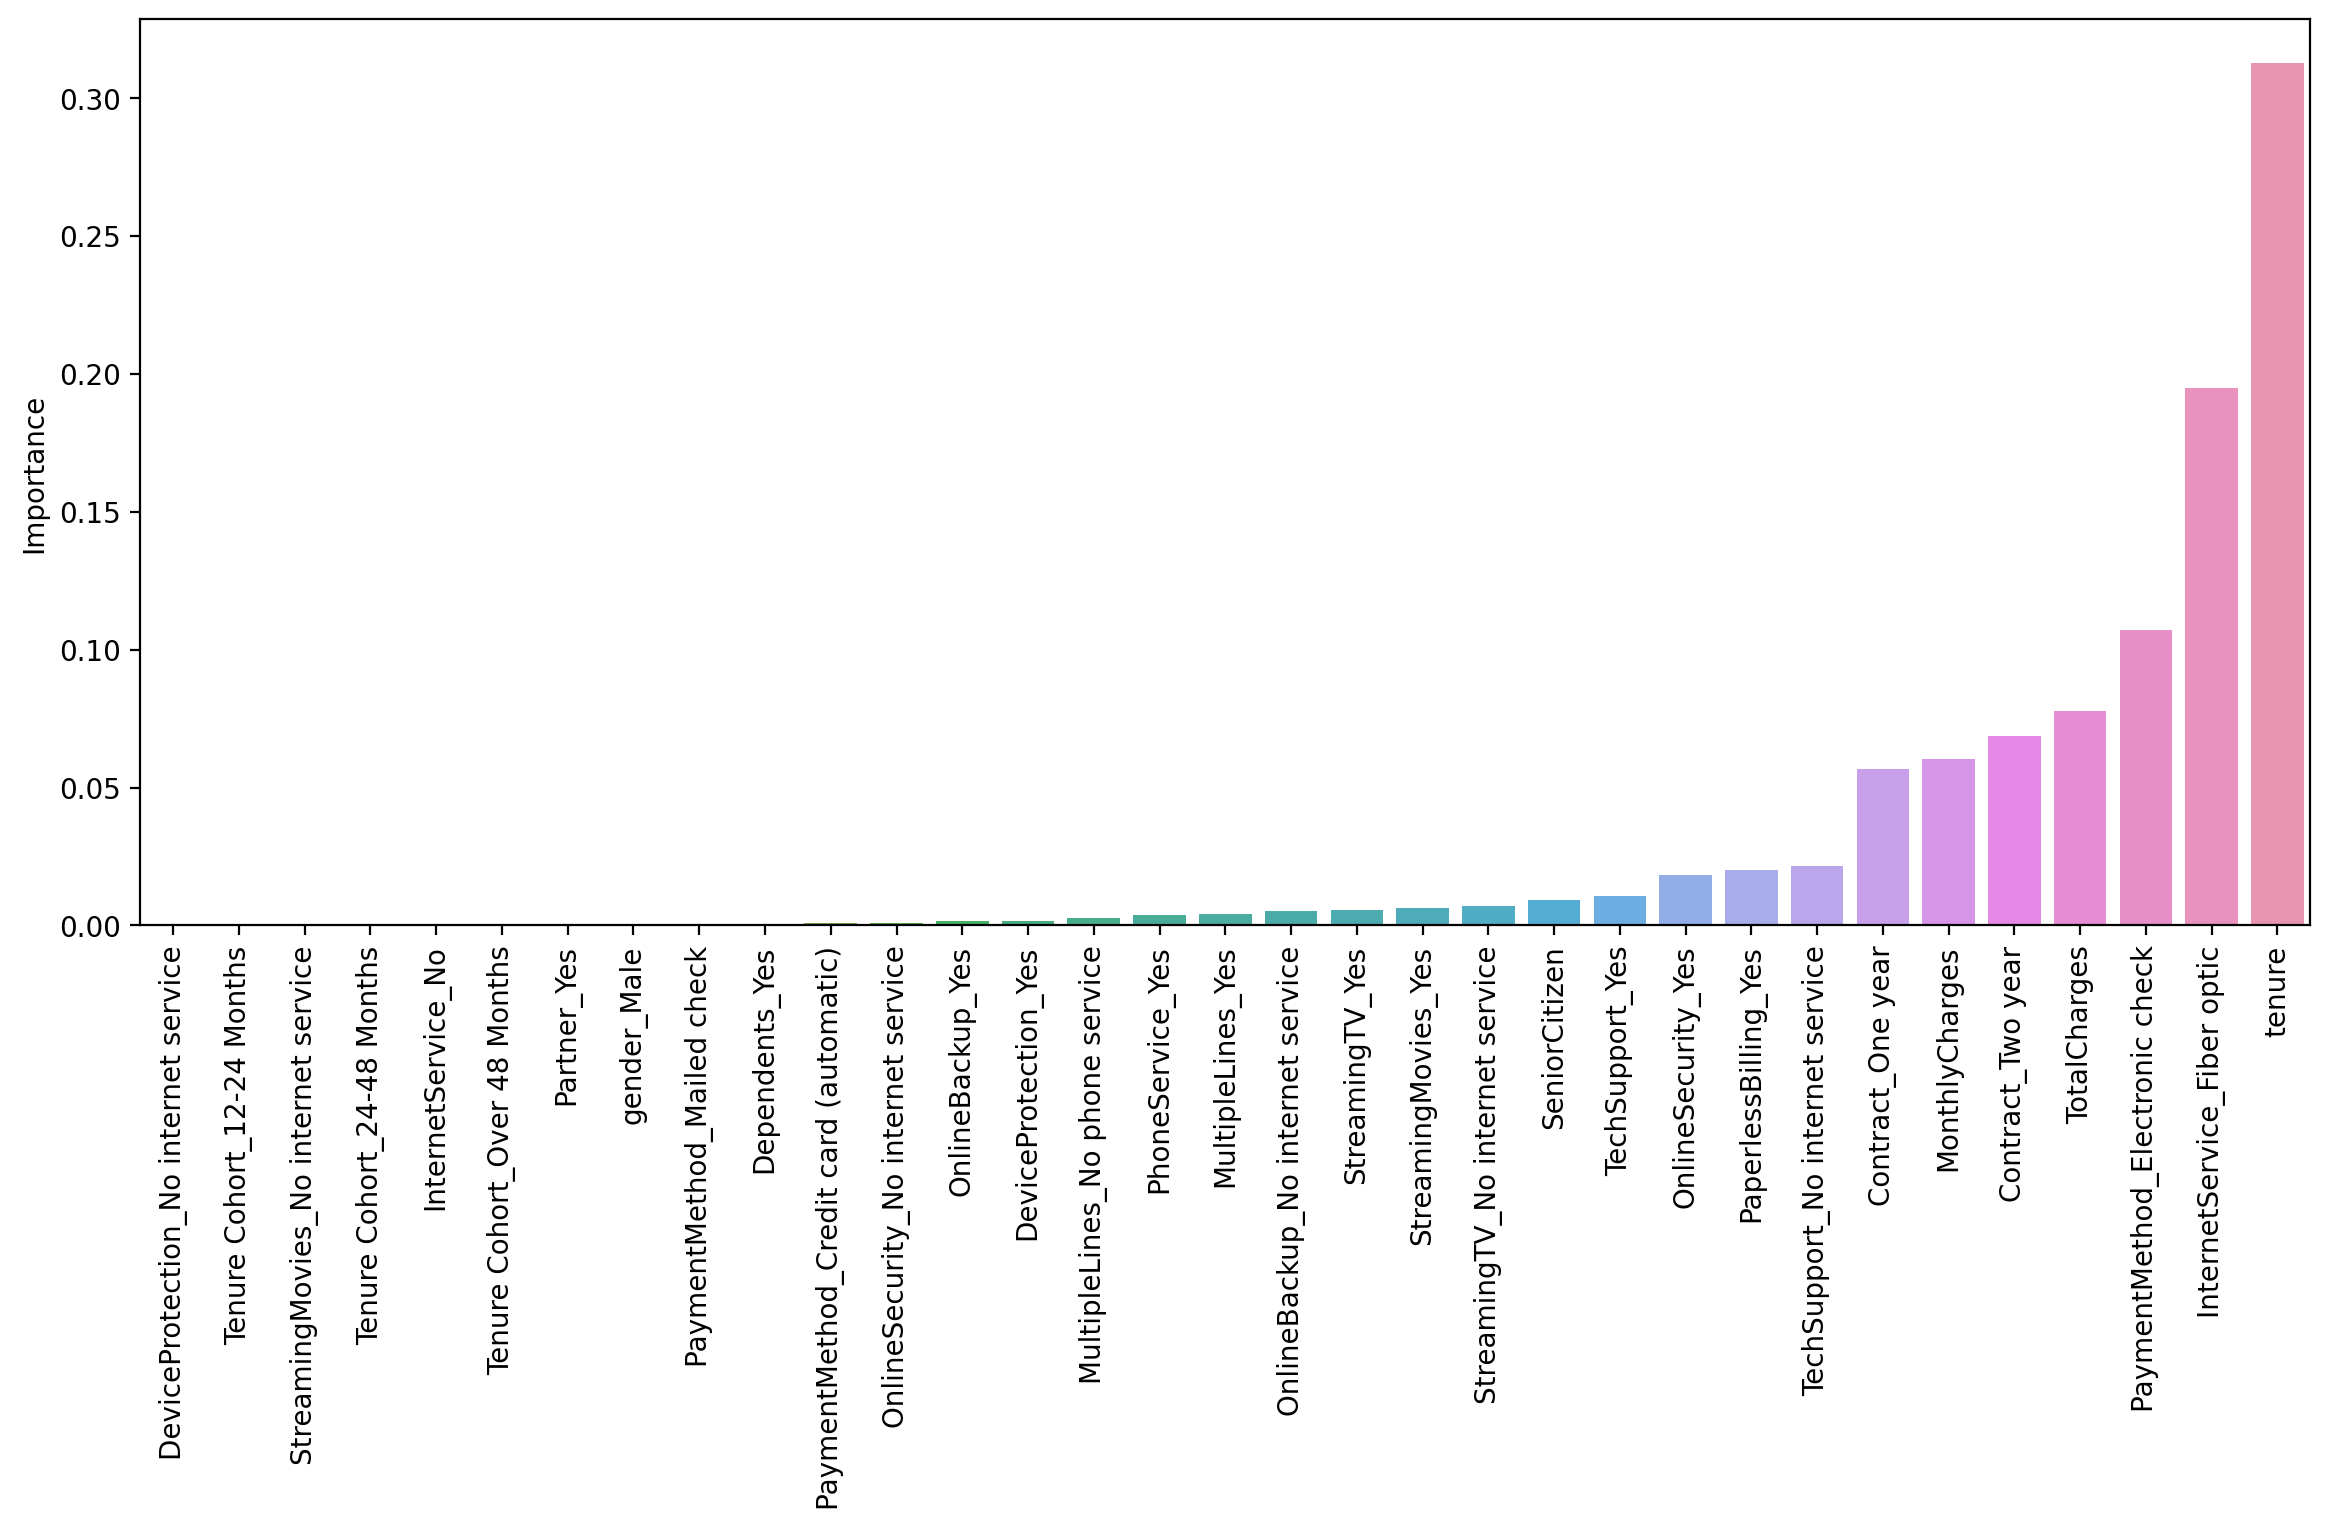

In [128]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feat.sort_values('Importance'),
            x=imp_feat.sort_values('Importance').index,
            y='Importance')
plt.xticks(rotation=90);